 ## Time Series data
Essentially, a time series is a collection of observations made sequentially in time

Let us generate (simulate) Time series data

In [ ]:
import os
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns #Seaborn is a library for making statistical graphics in Python

In [ ]:
# use numpy to generate a random dataset (50 samples)
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
mu, sigma = 0, 1 # mean and standard deviation
zero_mean_series = np.random.normal(mu, sigma, size=50)
zero_mean_series 

In [ ]:
#use seaborn to plot it
plt.figure(figsize=(16, 8))
g = sns.lineplot(data=zero_mean_series)
g.set_title('Zero mean model')
g.set_xlabel('Time index')
plt.show()

In [ ]:
plt.hist(zero_mean_series)

### We can perform a cumulative sum over the list and then plot the data using a time series plot. 
The plot gives more interesting results

In [ ]:
#cumsum---for any particular value, the next value is the sum of previous values.
random_walk = np.cumsum(zero_mean_series)
random_walk

In [ ]:
plt.figure(figsize=(16, 8))
g = sns.lineplot(data=random_walk)
g.set_title('Random Walk')
g.set_xlabel('Time index')
plt.show()

## Q: what does this plot show??
The change of values over time....what is the equation?

  # Pratcical Case Study

**Importing time-series data**

We are going to use Open Power System Data for TSA. 
It can be downloaded from https://open-power-system-data.org/

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# load time series dataset
data = pd.read_csv("energydata.csv")
data.columns


In [ ]:
len(data)

In [ ]:
data.head(2)
data.iloc[0:3]

## There are records from 2006 but no segregation of wind and solar

In [ ]:
data.tail(10)

Clearly we have records of all type of power consumption by 2017.

In [ ]:
# observations and variables
data.shape


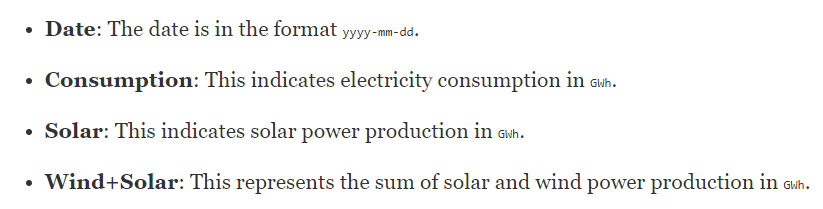

In [ ]:
data.dtypes

## Q: What is the issue here (data types)

In [ ]:
#convert object to datetime format 
#data['Date']
data['Date'] = pd.to_datetime(data['Date'])
data.dtypes

Now that the Date column is in correct datatype, let’s set it as the DataFrame’s index because in time series analysis the index column is always datetime column.

In [ ]:
data['Date']

In [ ]:
data = data.set_index('Date')
data.tail(3)

In [ ]:
# verify the index
data.index
#data.columns

# Analysing the DataFrame

In [ ]:
# Add columns with year, month, and weekday name
data['Year'] = data.index.year
data['Month'] = data.index.month  
data['Weekday Name'] = data.index.day_name()
data.head(2)

In [ ]:
# Display a random sampling of 5 rows
data.sample(5, random_state=0)

# Time based indexing

In [ ]:
#data.loc['2015-10-02']
data.loc['2015/10/02']

In [ ]:
# can provide range
data.loc['2017-01-01':'2017-12-30']

**Visualization for time series analysis**



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(16, 4)})
plt.rcParams['figure.dpi'] = 150

Let’s create a line plot of the full time series daily electricity consumption, using the pandas's plot() method.

In [ ]:
data['Consumption'].plot(linewidth=0.4)

In [ ]:
# multiple cloumns plotting using "dots"
cols_to_plot = ['Consumption', 'Solar', 'Wind'] # colums
axes = data[cols_to_plot].plot(marker='.', alpha=0.5, linestyle='None',figsize=(14, 7), subplots=True)

#following is for yaxis labelling
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

# Can you draw any conclusions from these patterns?

Solar production is higher in certain season (summer) and lower in other (winter). 

Over the years, there seems to have been a strong increasing trend in the output of wind powe

## Let us investigate a single year power consumption

In [ ]:
#consumption for year 2016
ax = data.loc['2016', 'Consumption'].plot()
ax.set_ylabel('Daily Consumption (GWh)');


## There is a drastic decrease in the consumption of electricity at the end of the year (December) and during August. 

Let us further investigate the month of December

In [ ]:
#december consumption
ax = data.loc['2016-12', 'Consumption'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)');


## Note: electricity consumption is higher on weekdays and lowest at the weekends.

Let us see consumption for the last week

In [ ]:
ax = data.loc['2016-12-23':'2016-12-30', 'Consumption'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)');


Electricity consumption  was lowest on the day of Christmas, probably because people were busy partying  
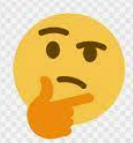

In [ ]:

# import dates module from matplotlib 
import matplotlib.dates as mdates

# plot graph
fig, ax = plt.subplots()

ax.plot(data.loc['2017-01':'2017-02', 'Consumption'], marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('Jan-Feb 2017 Electricity Consumption')

# to set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# to set format for x-tick labels as 3-letter month name and day number
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

**Seasonality**
## We can group the data in different time periods to use box plot to visualize it

https://www.simplypsychology.org/boxplots.html

In [ ]:
# Month-wise grouping
fig, axes = plt.subplots(3, 1, figsize=(8, 7), sharex=True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
  sns.boxplot(data=data, x='Month', y=name, ax=ax)
  ax.set_ylabel('GWh')
  ax.set_title(name)
  if ax != axes[-1]:
    ax.set_xlabel('')  


### Electricity consumption is generally higher in the winter and lower in the summer. 

### Solar production is higher during the summer. 

### There are many outliers associated with electricity consumption, wind production, and solar production

# we can group the consumption of electricity by the day of the week, and present it in a box plot

In [ ]:
sns.boxplot(data=data, x='Weekday Name', y='Consumption');


### Note:Electricity consumption is higher on weekdays than on weekends. Interestingly, there are more outliers on the weekdays

## Resampling the time series data

It is often required to resample the dataset at lower or higher frequencies. This resampling is done based on aggregation or grouping operations. 

For example, we can resample the data based on the weekly mean time series as follows:

In [ ]:
# weekly average of data
columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']

power_weekly_mean = data[columns].resample('W').mean()
power_weekly_mean.head(10)

## plot the daily and weekly time series to compare the dataset over the six-month period. 

In [ ]:
# For last six months of 2016

start, end = '2016-01', '2016-06'


In [ ]:
fig, ax = plt.subplots()

ax.plot(data.loc[start:end, 'Solar'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(power_weekly_mean.loc[start:end, 'Solar'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Solar Production in (GWh)')
ax.legend();

## The weekly mean time series is increasing over time and is much smoother than the daily time series. 